In [79]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from pandas_datareader import DataReader
from datetime import datetime
from __future__ import division

In [80]:
# will use tech companies for this analysis. 
tech = ['ADBE','AMD','HPE']
start = '1992-01-01'
end = '2021-08-21'

for stock in tech:   
    # this will make a dataframe for each company
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [81]:
HPE.describe()


,High,Low,Open,Close,Volume,Adj Close
count,1471.000000,1471.000000,1471.000000,1471.000000,1.471000e+03,1471.000000
mean,13.532249,13.191779,13.355979,13.363457,1.332938e+07,12.242631
std,2.673671,2.682289,2.678975,2.674952,7.991492e+06,2.543026
min,7.090726,6.756532,6.974485,7.009357,1.030610e+05,6.069181
25%,11.528480,11.205672,11.341427,11.461403,8.297050e+06,10.292768
50%,14.076835,13.790000,13.910000,13.930000,1.126999e+07,12.434499
75%,15.607500,15.235000,15.420000,15.435000,1.593565e+07,14.317271
max,19.475000,19.000000,19.240000,19.410000,8.066282e+07,17.291254


In [82]:
AMD.describe()


,High,Low,Open,Close,Volume,Adj Close
count,7467.000000,7467.000000,7467.000000,7467.000000,7.467000e+03,7467.000000
mean,16.011374,15.319748,15.678073,15.667906,2.184219e+07,15.667906
std,17.140749,16.482020,16.820915,16.823133,2.752784e+07,16.823133
min,1.690000,1.610000,1.620000,1.620000,0.000000e+00,1.620000
25%,6.780000,6.460000,6.625000,6.595000,4.848200e+06,6.595000
50%,11.140000,10.620000,10.900000,10.875000,1.226310e+07,10.875000
75%,17.495000,16.850000,17.187500,17.187500,2.753075e+07,17.187500
max,122.489998,114.160004,116.629997,118.769997,3.250584e+08,118.769997


### Adj Close price for Adobe

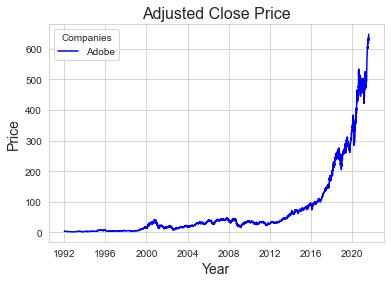

In [83]:
plt.plot(ADBE['Adj Close'], label='Adobe', color='blue')
plt.legend(title='Companies')
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('Adjusted Close Price', fontsize=16)
plt.show()

### Adj Close price for all companies

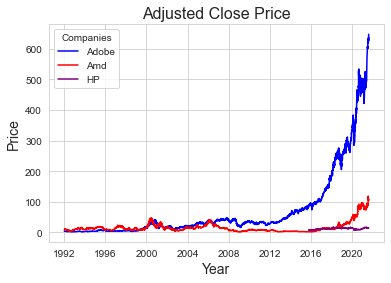

In [84]:
plt.plot(ADBE['Adj Close'], label='Adobe', color='blue')
plt.plot(AMD['Adj Close'], label='Amd', color='red')
plt.plot(HPE['Adj Close'], label='HP', color='purple')

#add legend
plt.legend(title='Companies')

#add axes labels and a title
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('Adjusted Close Price', fontsize=16)

#display plot
plt.show()

### Moving Average price

In [85]:
#will observe the trend of Adobe with the help of a 50-day 200-day average

In [86]:
ADBE['M50'] = ADBE['Adj Close'].rolling(50).mean()
ADBE['M200'] = ADBE['Adj Close'].rolling(200).mean()

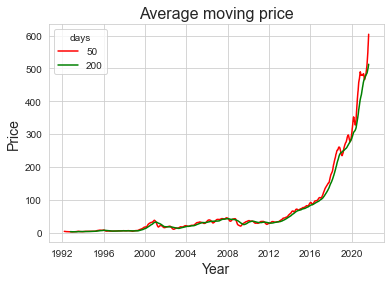

In [87]:
plt.plot(ADBE['M50'], label='50', color='red')
plt.plot(ADBE['M200'], label='200', color='green')
plt.legend(title='days')
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('Average moving price', fontsize=16)
plt.show()

In [88]:
### daily return average of a stock

<AxesSubplot:xlabel='Date'>

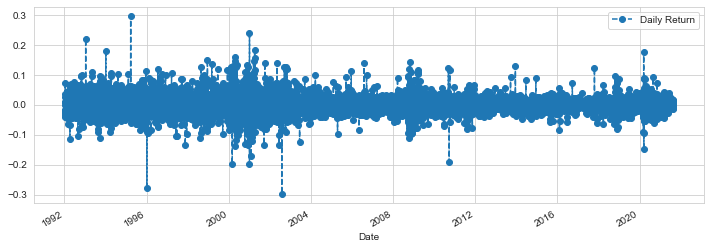

In [89]:
# We'll use pct_change to find the percent change for each day
ADBE['Daily Return'] = ADBE['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
ADBE['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

C:\Users\samar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

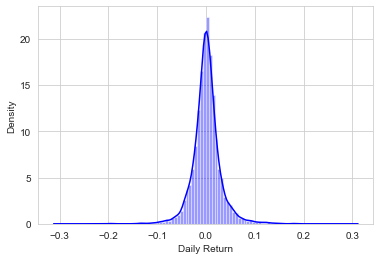

In [90]:
sns.distplot(ADBE['Daily Return'].dropna(),bins=100,color='blue')


### correlation between daily returns of different stocks

In [32]:
start_data = "2020-01-01"
end_data = '2021-8-22'

In [33]:
all = DataReader(['ADBE','AMD','HPE'],'yahoo',start_data,end_data)['Adj Close']


In [34]:
all.head()

Symbols,ADBE,AMD,HPE
Date,,,
2019-12-31,329.809998,45.860001,14.942180
2020-01-02,334.429993,49.099998,15.234241
2020-01-03,331.809998,48.599998,14.857389
2020-01-06,333.709991,48.389999,14.810282
2020-01-07,333.390015,48.250000,14.734914


In [35]:
corr = all.corr(method='pearson')
corr.head().reset_index()
corr.head(10)

Symbols,ADBE,AMD,HPE
Symbols,,,
ADBE,1.000000,0.882975,0.415160
AMD,0.882975,1.000000,0.350314
HPE,0.415160,0.350314,1.000000


<Figure size 432x288 with 0 Axes>

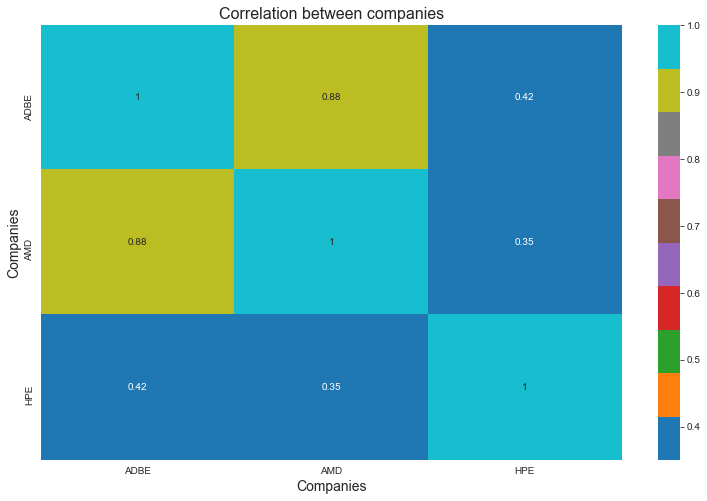

<Figure size 432x288 with 0 Axes>

In [36]:
plt.figure(figsize=(13, 8))
sns.heatmap(corr, annot=True, cmap="tab10")
plt.title('Correlation between companies', fontsize=16)
plt.ylabel('Companies', fontsize=14)
plt.xlabel('Companies', fontsize=14)
plt.figure()

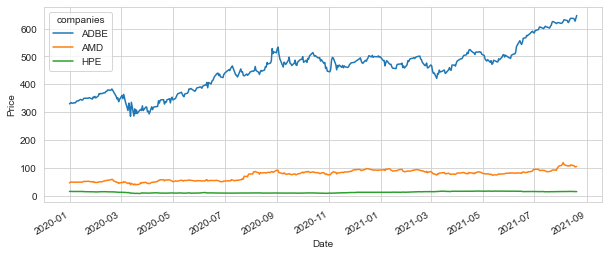

In [37]:
all.plot(figsize=(10,4))
plt.ylabel('Price')
plt.legend(title='companies')


In [38]:
### Daily return

Text(0, 0.5, 'Daily Percentage Return')

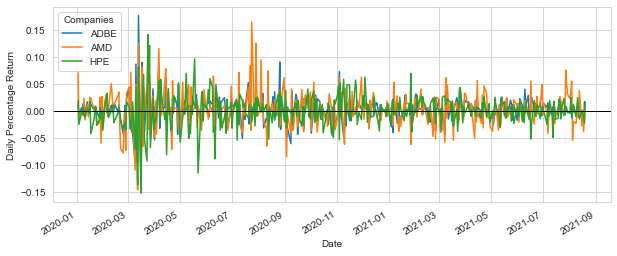

In [39]:
Daily_return=all.pct_change()
Daily_return.plot(figsize=(10,4))
plt.axhline(0, color='black', lw=1)
plt.legend(title='Companies')
plt.ylabel('Daily Percentage Return')

### Risk Analysis


In [41]:
risk = all.pct_change()
risk = risk.dropna()


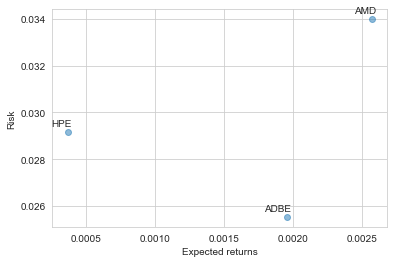

In [76]:
plt.scatter(risk.mean(), risk.std(),alpha = 0.5)
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(risk.columns, risk.mean(), risk.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (4, 4),
        textcoords = 'offset points', ha = 'right', va = 'bottom')


will explain:
AMD: High risk and High return
ADBE: low risk and medium return
HPE: medium risk and medium return

In [ ]:
#For a particular confidence interval, value at risk can be defined as the amount of money we can expect to lose.

In [ ]:
# ADBE risk using the "bootstrap" method
# The quantiles help us define our confidence interval.


In [94]:
risk['ADBE'].quantile(0.05)


-0.03390032188843055